In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("datasets_33080_43333_car data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.shape

(301, 9)

In [9]:
print("Seller_Type: ",df['Seller_Type'].unique())
#print("Carname: ",df['Car_Name'].unique())
print("Fuel_Type ",df['Fuel_Type'].unique())
print("Transmission: ",df['Transmission'].unique())
print("Owner: ",df['Owner'].unique())

Seller_Type:  ['Dealer' 'Individual']
Fuel_Type  ['Petrol' 'Diesel' 'CNG']
Transmission:  ['Manual' 'Automatic']
Owner:  [0 1 3]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
def year_diff(year):
    return 2020-year

In [12]:
df['Year_diff'] = df['Year'].apply(year_diff)

In [13]:
final_df = df.drop(['Year','Car_Name'],axis=1)

In [14]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_diff
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [15]:
final_df = pd.get_dummies(final_df,drop_first=True)

In [16]:
corrmat = final_df.corr()

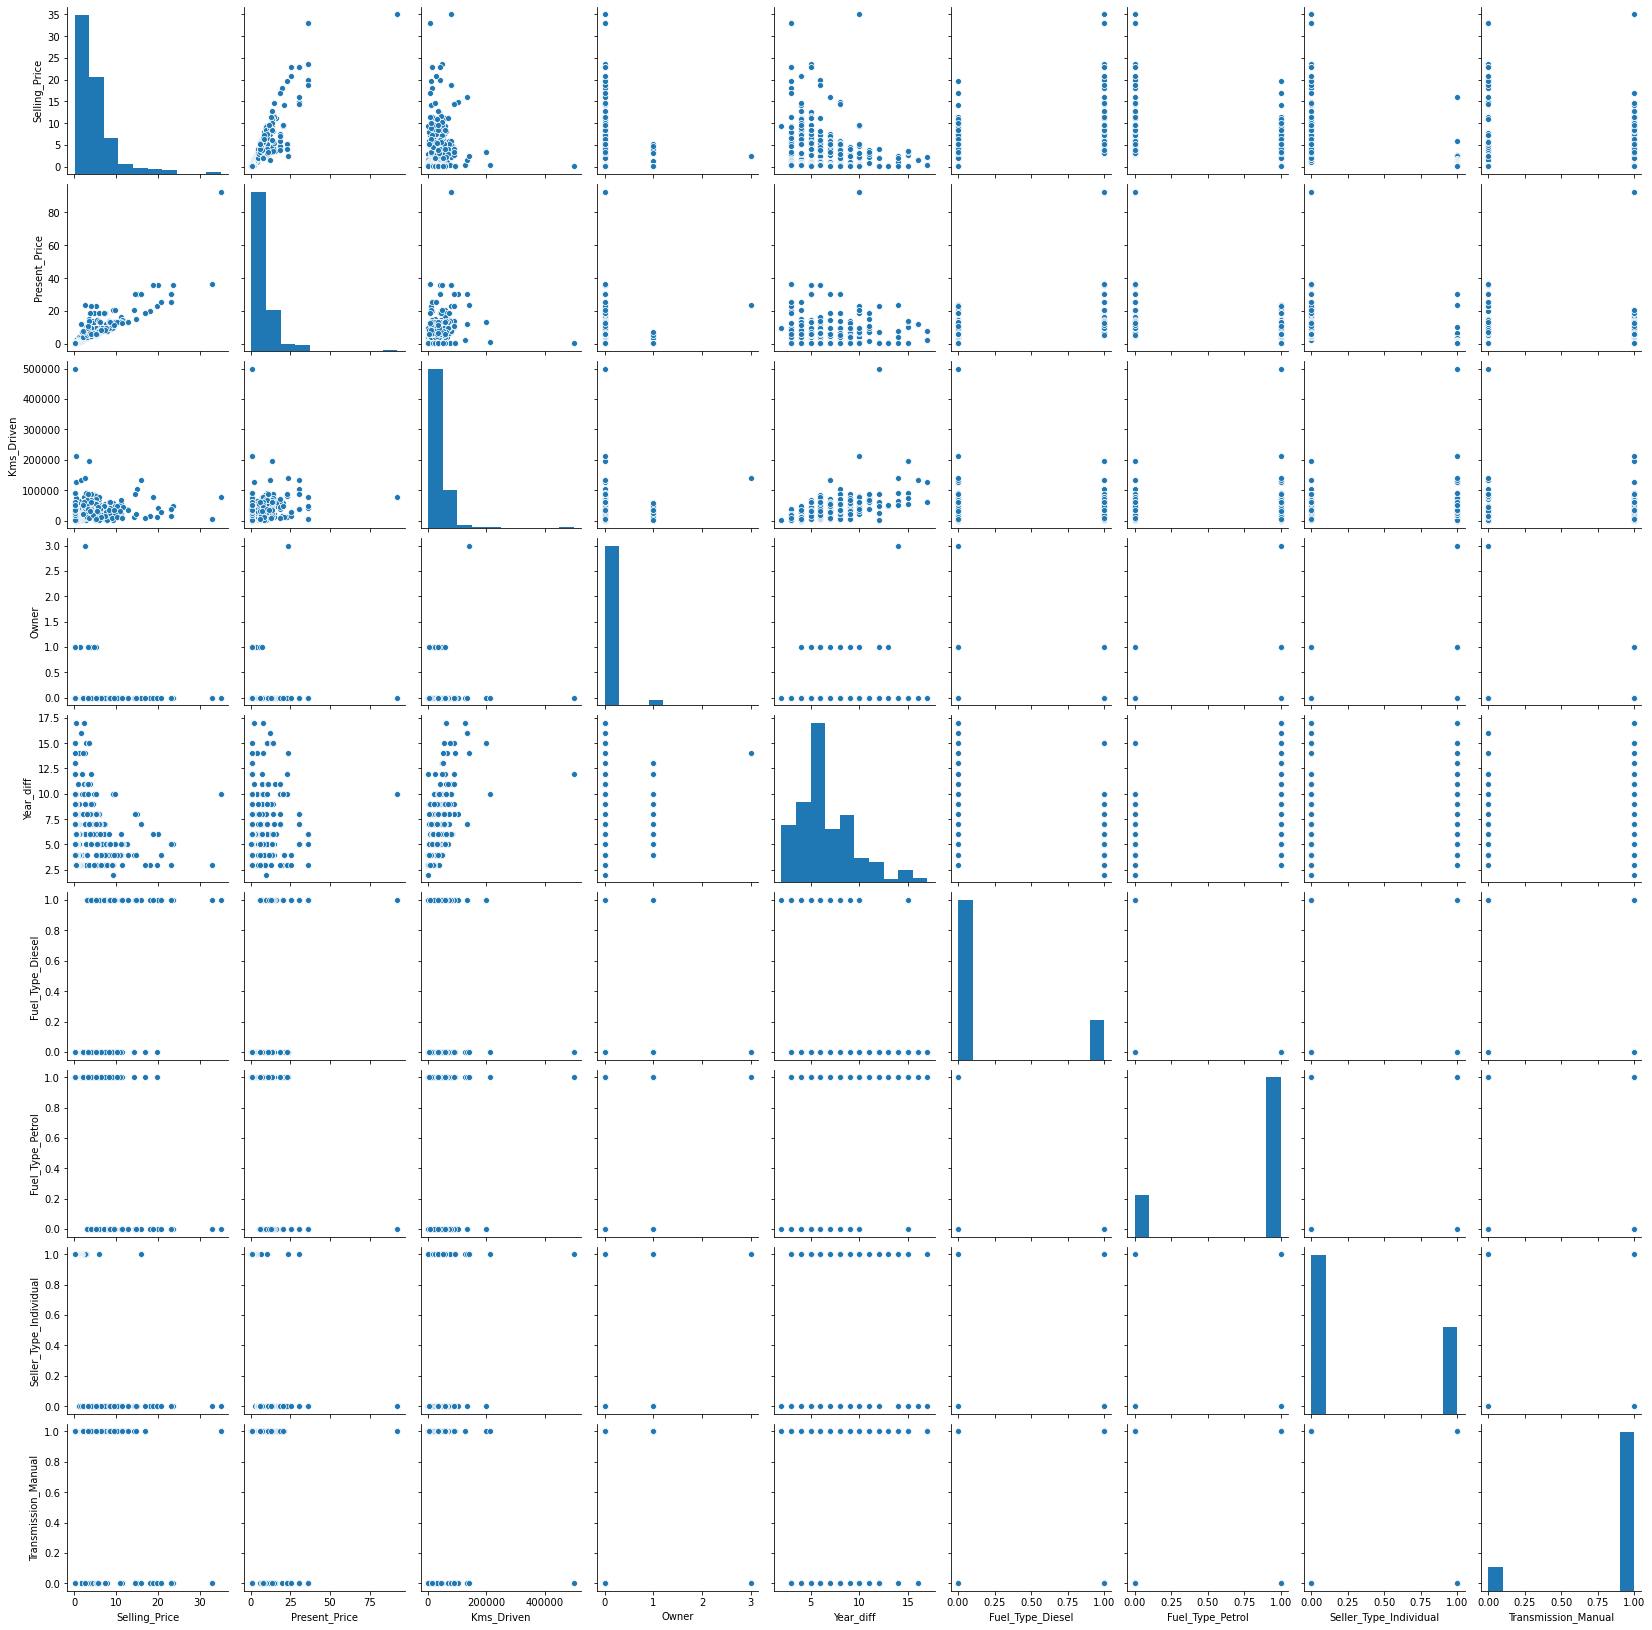

In [17]:
sns.pairplot(final_df)

<AxesSubplot:>

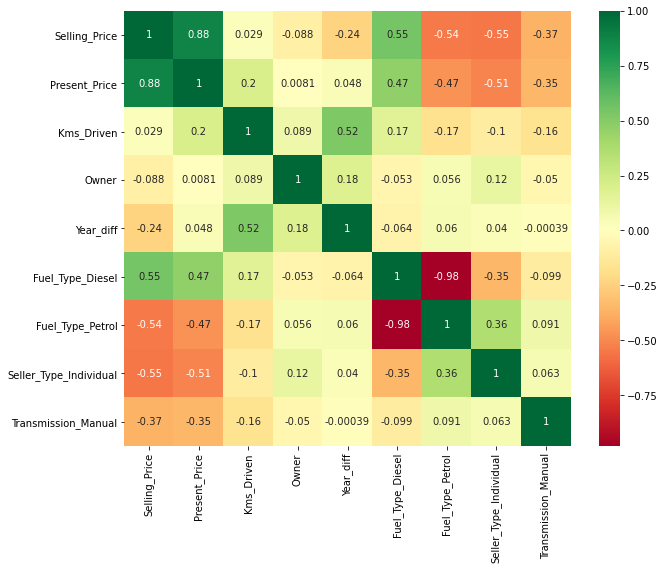

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,annot=True,cmap = 'RdYlGn')

In [19]:
X = final_df.drop('Selling_Price',axis=1)
y = final_df['Selling_Price']

In [20]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.39029979 0.04574435 0.0007209  0.07146415 0.21821623 0.01397453
 0.1295767  0.13000335]


<AxesSubplot:>

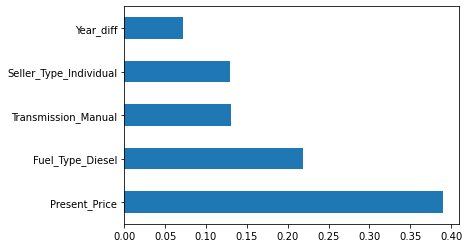

In [23]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_random =RandomForestRegressor()

In [26]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]


max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

max_features=['auto','sqrt']


In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()

In [30]:
rf_random = RandomizedSearchCV(estimator=  rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
predictions =  rf_random.predict(X_test)

In [33]:
predictions

array([ 4.8353 ,  0.59817,  9.2675 , 15.71744,  5.09677,  2.52446,
        2.53945,  1.03299,  5.41103,  0.60632,  4.35737,  5.5084 ,
        4.67226,  3.59034, 12.71424,  0.34587,  0.43619,  8.76201,
        0.69543,  8.83145,  4.37845,  6.34957,  3.87921, 11.10378,
        5.79695,  5.08872,  7.29545,  1.00611,  0.49912,  0.64474,
        0.34391,  0.37312,  1.22651,  8.36891,  6.04275,  6.23857,
        9.09432,  4.62005,  8.04371,  1.09121,  7.14171,  0.48895,
        2.36929,  3.63538,  3.60785,  1.00465,  3.13257,  6.9963 ,
        0.30042,  4.0385 ,  3.65375,  0.50256,  4.02059,  0.7075 ,
        9.56541,  2.93665,  0.76731,  7.57638,  0.62367,  0.94539,
        0.89334])

<AxesSubplot:xlabel='Selling_Price'>

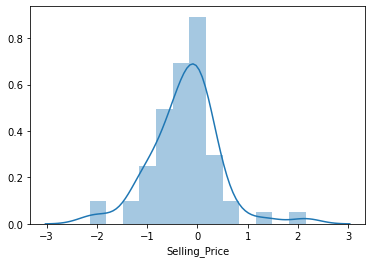

In [34]:
sns.distplot(y_test-predictions)

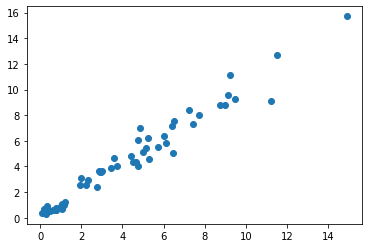

In [35]:
plt.scatter(y_test,predictions)

In [36]:
import pickle

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5021154098360632
MSE: 0.506959928901637
RMSE: 0.7120111859385616


In [39]:
X_train

,Present_Price,Kms_Driven,Owner,Year_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
92,13.70,75000,0,15,0,1,0,1
167,0.81,42000,0,6,0,1,1,1
90,18.61,62000,0,11,0,1,0,1
235,9.40,15141,0,3,0,1,0,1
97,18.64,8700,0,3,0,1,0,1
...,...,...,...,...,...,...,...,...
210,4.60,35775,0,8,0,1,0,1
156,0.52,15000,0,3,0,1,1,1
189,0.57,55000,0,15,0,1,1,1
32,7.49,39000,0,6,1,0,0,1
